In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from urllib.request import urlopen
from datetime import datetime
from bs4 import BeautifulSoup
import squarify
import scipy.stats
import re

country = input('country : ')
city = input('City : ')
url = f"https://www.timeanddate.com/weather/{country}/{city}/ext"
page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')
text = soup.get_text()
# print(soup.prettify())
day_str = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
drum = soup.find_all('table', {'class': 'zebra tb-wt fw va-m tb-hover'}, id='wt-ext')
store = []
data = []
data1 = []
# print(drum)
for i in drum:
    children = i.findChildren('td', recursive=True)
    # children1 = i.findChildren('td', {'class': 'small'}, recursive=True)

    for j in children:
        child = j.text
        # print(child)
        if child.isalnum():  # isalnum()
            data.append(child)
        else:
            data1.append(child)

# print(data1)
tem_f = []
exc = []
tem_fm = []
for i in data1:
    if len(i) >= 6 or i == '' or i == '-' or i == '↑':
        tem_f.append(i)
    else:
        exc.append(i)

for y in data1:
    if len(y) >= 6 and y[-1] == 'h':
        tem_fm.append(y)

# print(tem_f)
# print(exc)
# print(tem_fm)

clean = []
destroy = []
for j in exc:
    if j[0].isalpha():
        destroy.append(j)
    else:
        clean.append(j)

# print(clean)
# print(destroy)

Humidity = []
wind = []
high_low = []
for k in clean:
    if len(k) <= 3:
        Humidity.append(k)

# print(Humidity)
# print(high_low)

temp = []
for h in tem_f:
    if len(h) > 7 and h[-1] == 'C':
        temp.append(h)

# print(temp)

# c = Humidity[::2]

# print(c)

string = []
for i in temp:
    s = i.split()
    string.append(s)

# print(string)

temp_h = []
for i in string:
    a = i[0]
    temp_h.append(a)

# print(temp_h)

low_t = []
for i in string:
    l = i[2]
    low_t.append(l)

a = len(day_str)
avg_temp = []
for o in range(0, a):
    if int(temp_h[o])!=0 & int(low_t[o])!=0:
        A = (int(temp_h[o]) + int(low_t[o])) / 2
        avg_temp.append(round(A))
        o += 1
    else:
        a = int(temp_h[o])+int(low_t[o])
        avg_temp.append(a)

print(avg_temp)
humidity = []
for t in Humidity:
    d = int(re.search(r'\d+', t).group())
    humidity.append(d)

# print(humidity)
c = humidity[::2]
# print(low_t)
#
for e in tem_fm:
    b = e.split()
    s = b[0]
    wind.append(s)

print(wind)
#
field = ['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', "Avg Temp"]
b = len(day_str)
i = 0
for i in range(0, b):
    a = {"Day": f"{day_str[i]}", "High Temp": f"{temp_h[i]}", "Low Temp": f"{low_t[i]}",
         "Humidity": f"{c[i]}", "WindSpeed": f"{wind[i]}", "Avg Temp": f"{avg_temp[i]}"}
    store.append(a)
    i += 1


# print(store)

with open('sample.csv', 'w') as sam:
    writer = csv.DictWriter(sam, fieldnames=field)
    writer.writeheader()
    writer.writerows(store)

# df = pd.read_csv("sample.csv")

# u = df["Avg Temp"]
# v = df["Day"]
# w = df["High Temp"]
# x = df['Low Temp']
# y = df['Humidity']
# z = df['WindSpeed']

# plt.xlabel('Days ')
# plt.ylabel('Temperature')
# # plt.bar_label
# plt.scatter(v, w, color='red')
# plt.scatter(v, x, color='skyblue')
# plt.scatter(v, u, color='magenta')
# plt.show()


country : India
City : Shimla
[8, 3, 5, 6, 10, 11, 12, 12, 14, 15, 15, 14, 12, 11, 14]
['8', '9', '8', '9', '10', '10', '7', '7', '9', '6', '10', '8', '7', '8', '5']


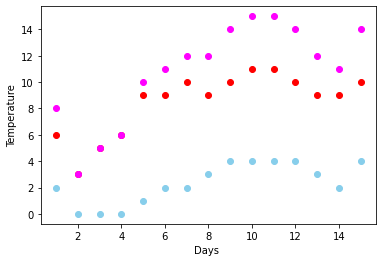

In [2]:
df = pd.read_csv("sample.csv")
u = df["Avg Temp"]
v = df["Day"]
w = df["High Temp"]
x = df['Low Temp']
y = df['Humidity']
z = df['WindSpeed']
plt.xlabel('Days ')
plt.ylabel('Temperature')
plt.scatter(v, w, color='red')
plt.scatter(v, x, color='skyblue')
plt.scatter(v, u, color='magenta')
plt.show()


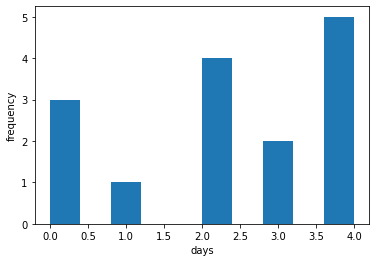

In [3]:
plt.hist(x )
plt.xlabel('days')
plt.ylabel('frequency')
plt.show()

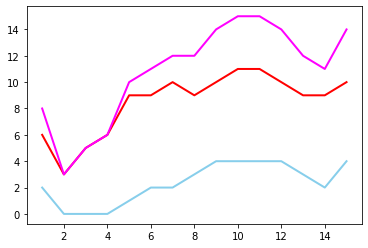

In [5]:
plt.plot(v, w, color='red', linewidth=2.0)
plt.plot(v, x, color='skyblue', linewidth=2.0)
plt.plot(v, u, color='magenta', linewidth=2.0)

plt.show()

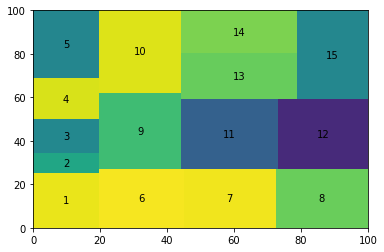

In [6]:
squarify.plot(u, label=day_str)
plt.show()

In [8]:
df.columns

Index(['Day', 'High Temp', 'Low Temp', 'Humidity', 'WindSpeed', 'Avg Temp'], dtype='object')

In [9]:
df.head()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
0,1,6,2,54,8,8
1,2,3,0,72,9,3
2,3,5,0,55,8,5
3,4,6,0,38,9,6
4,5,9,1,26,10,10


In [10]:
df.tail()

,Day,High Temp,Low Temp,Humidity,WindSpeed,Avg Temp
10,11,11,4,73,10,15
11,12,10,4,42,8,14
12,13,9,3,54,7,12
13,14,9,2,33,8,11
14,15,10,4,32,5,14


<AxesSubplot:xlabel='Avg Temp', ylabel='Humidity'>

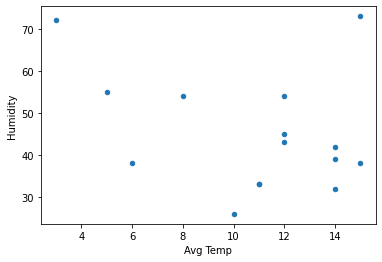

In [11]:
df.plot(x='Avg Temp', y='Humidity', kind="scatter")

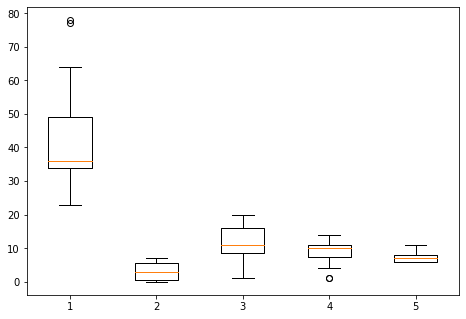

In [8]:
# u = df["Avg Temp"]
# v = df["Day"]
# w = df["High Temp"]
# x = df['Low Temp']
# y = df['Humidity']
# z = df['WindSpeed']
data = [y, x, u, w, z]
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0.1, 0.1, 1, 1])
# Create the boxplot
bp = ax.boxplot(data)
plt.show()

In [12]:
from scipy.stats import pearsonr
list1 = df['High Temp']
list2 = df['Low Temp']
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.838


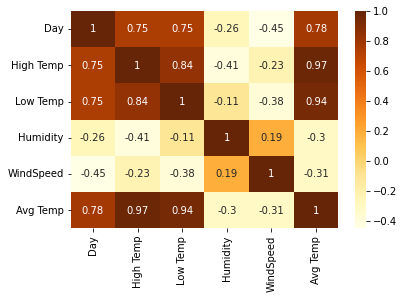

In [13]:
sns.heatmap(df.corr(),cmap="YlOrBr",annot=True);

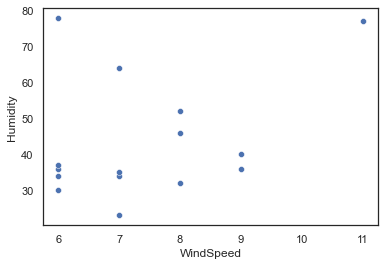

In [10]:
sns.set_theme(style="white")
sns.scatterplot(x="WindSpeed", y="Humidity",data=df);

<AxesSubplot:>

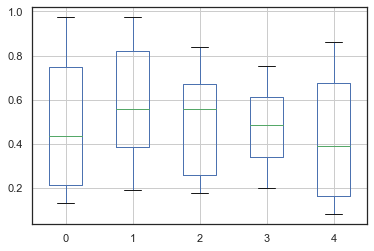

In [26]:
import numpy as np
df= pd.DataFrame(np.random.rand(10, 5))
df.plot.box(grid='True')